# 1. Importing Required Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import kagglehub

#2. Downloading the Dataset

In [ ]:
path = kagglehub.dataset_download("zalando-research/fashionmnist")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


# 3. Visualizing the Data

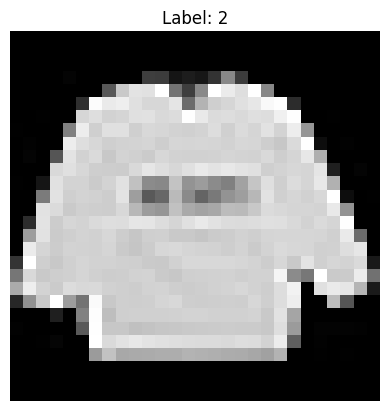

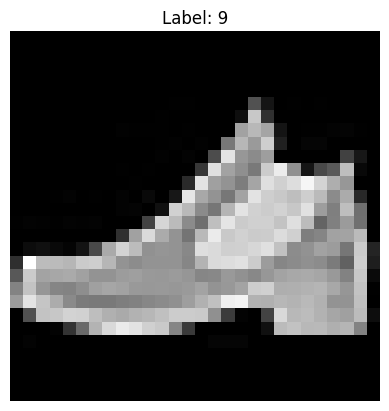

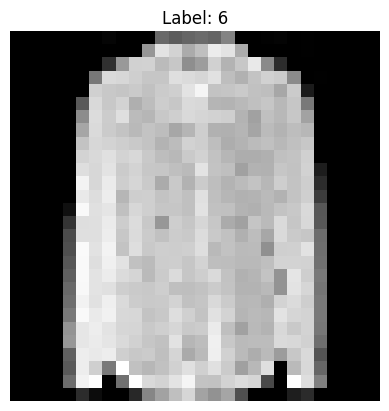

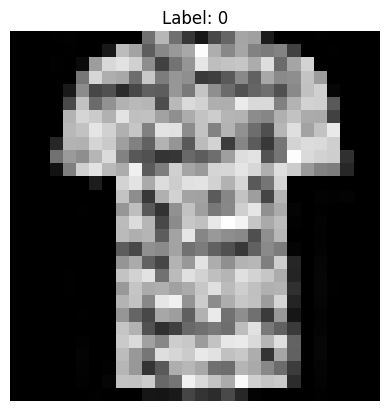

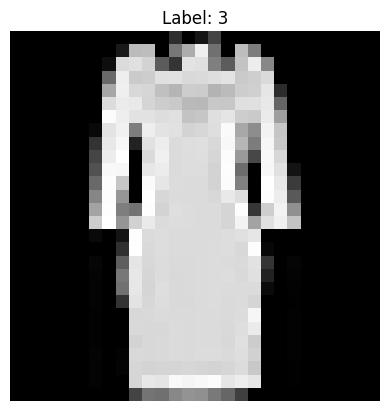

In [ ]:
csv_file = f"{path}/fashion-mnist_train.csv"
data = pd.read_csv(csv_file)
labels = data.iloc[:, 0].values
images = data.iloc[:, 1:].values.reshape(-1, 28, 28)
for i in range(5):
    plt.imshow(images[i], cmap="gray")
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
    plt.show()

#4. Preprocessing the Data

In [ ]:
labels = data.iloc[:, 0].values
images = data.iloc[:, 1:].values.reshape(-1, 28, 28)
images = images / 255.0
X = images.reshape(images.shape[0], -1)

#5. Splitting the Data

Training set shape: (48000, 784) (48000,)
Test set shape: (12000, 784) (12000,)


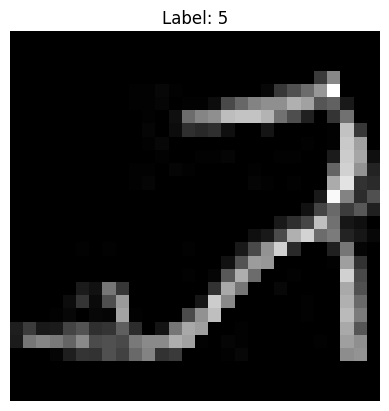

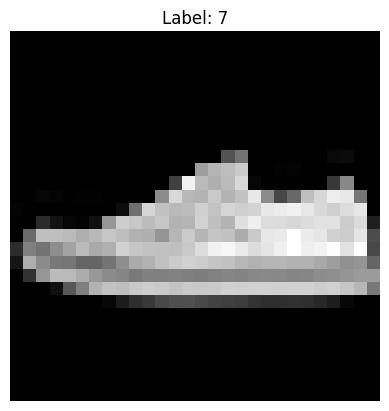

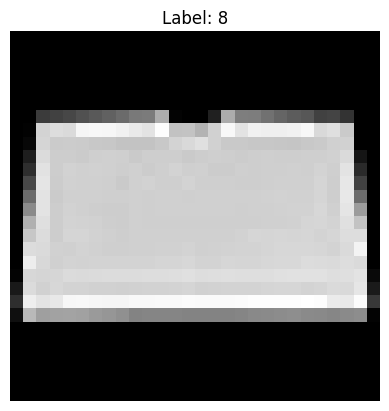

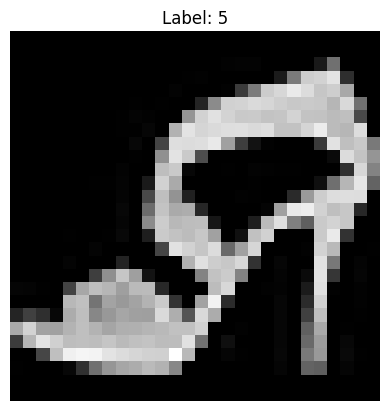

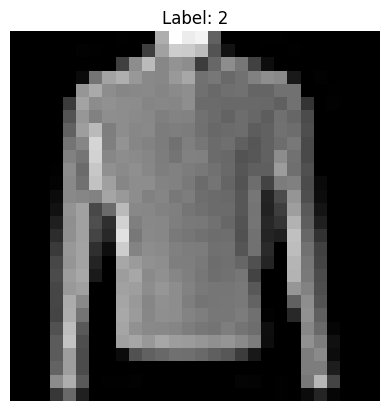

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
for i in range(5):
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
    plt.show()

In [ ]:
X_train.shape

(48000, 784)

In [ ]:
y_train.shape

(48000,)

#6. Converting Data to PyTorch Tensors

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

X_train_tensor shape: torch.Size([48000, 784])
y_train_tensor shape: torch.Size([48000])
X_test_tensor shape: torch.Size([12000, 784])
y_test_tensor shape: torch.Size([12000])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


#7. Defining the Neural Network

In [ ]:
n_input = X_train_tensor.shape[1]
n_classes = 10
model = nn.Sequential(
    nn.Linear(n_input, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, n_classes),
    nn.Softmax(dim=1)
)

In [ ]:
model = model.to(device)

#8. Loss Function and Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

#9. Training the Model

In [ ]:
epochs = 100
batch_size = 32
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for Xbatch, ybatch in train_loader:
        Xbatch = Xbatch.to(device)
        ybatch = ybatch.to(device)
        y_pred = model(Xbatch)
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")


Epoch 1/100, Loss: 1.6988
Epoch 2/100, Loss: 1.6330
Epoch 3/100, Loss: 1.6231
Epoch 4/100, Loss: 1.6148
Epoch 5/100, Loss: 1.6080
Epoch 6/100, Loss: 1.6009
Epoch 7/100, Loss: 1.5988
Epoch 8/100, Loss: 1.5942
Epoch 9/100, Loss: 1.5931
Epoch 10/100, Loss: 1.5886
Epoch 11/100, Loss: 1.5878
Epoch 12/100, Loss: 1.5856
Epoch 13/100, Loss: 1.5836
Epoch 14/100, Loss: 1.5828
Epoch 15/100, Loss: 1.5810
Epoch 16/100, Loss: 1.5798
Epoch 17/100, Loss: 1.5766
Epoch 18/100, Loss: 1.5779
Epoch 19/100, Loss: 1.5768
Epoch 20/100, Loss: 1.5752
Epoch 21/100, Loss: 1.5755
Epoch 22/100, Loss: 1.5746
Epoch 23/100, Loss: 1.5738
Epoch 24/100, Loss: 1.5741
Epoch 25/100, Loss: 1.5752
Epoch 26/100, Loss: 1.5728
Epoch 27/100, Loss: 1.5729
Epoch 28/100, Loss: 1.5697
Epoch 29/100, Loss: 1.5686
Epoch 30/100, Loss: 1.5720
Epoch 31/100, Loss: 1.5721
Epoch 32/100, Loss: 1.5737
Epoch 33/100, Loss: 1.5686
Epoch 34/100, Loss: 1.5711
Epoch 35/100, Loss: 1.5688
Epoch 36/100, Loss: 1.5689
Epoch 37/100, Loss: 1.5743
Epoch 38/1

#10. Testing the Model

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred_test, dim=1)
    accuracy = (y_pred_classes == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8753


#11. Testing and Outputting Predictions

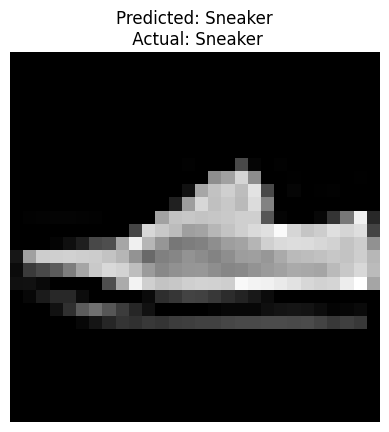

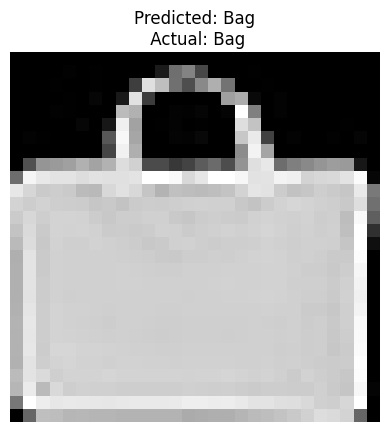

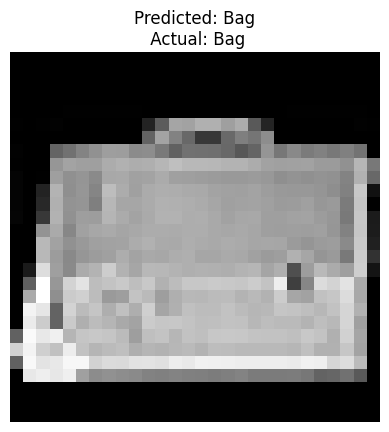

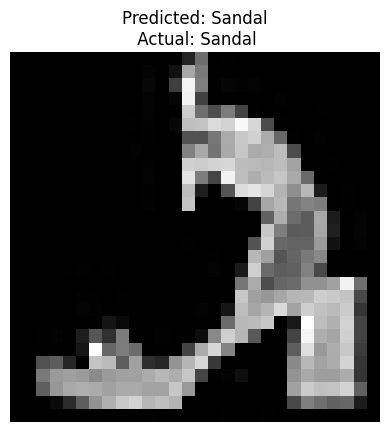

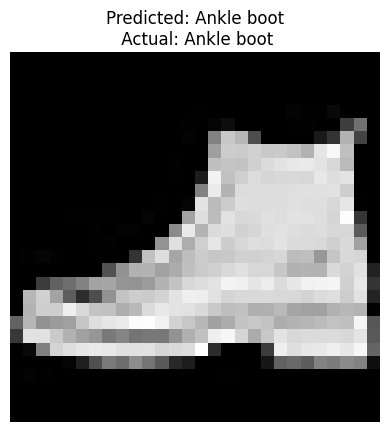

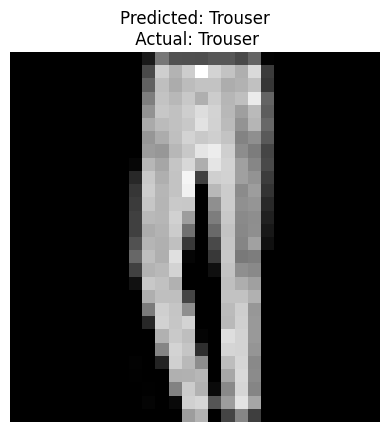

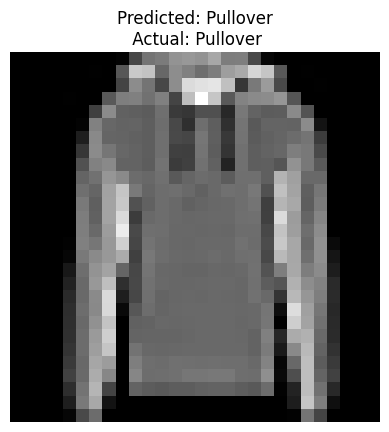

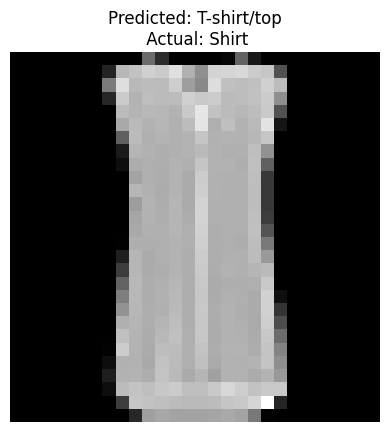

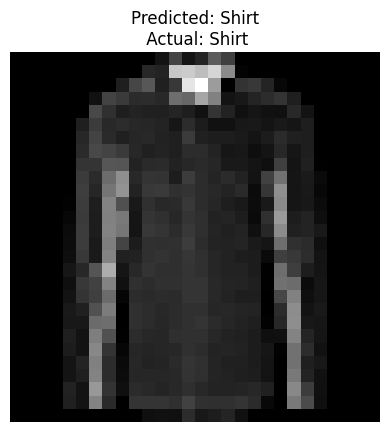

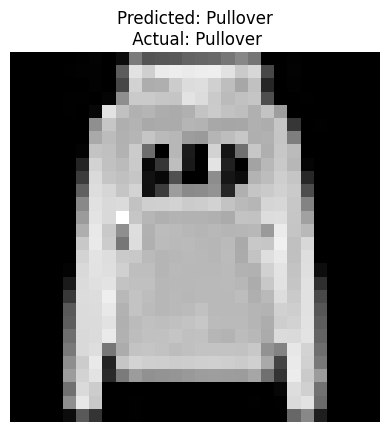

In [ ]:
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
with torch.no_grad():
    for i in range(10):
        plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
        predicted_class = class_names[y_pred_classes[i].item()]
        actual_class = class_names[y_test[i]]
        plt.title(f"Predicted: {predicted_class}\n Actual: {actual_class}")
        plt.axis("off")
        plt.show()